<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding: 20px; background-color:red;color: Black;font-weight: bold;
          text-align: center; font-size:250%;border-radius:20px 80px;">Insurance Cost Prediction</p>

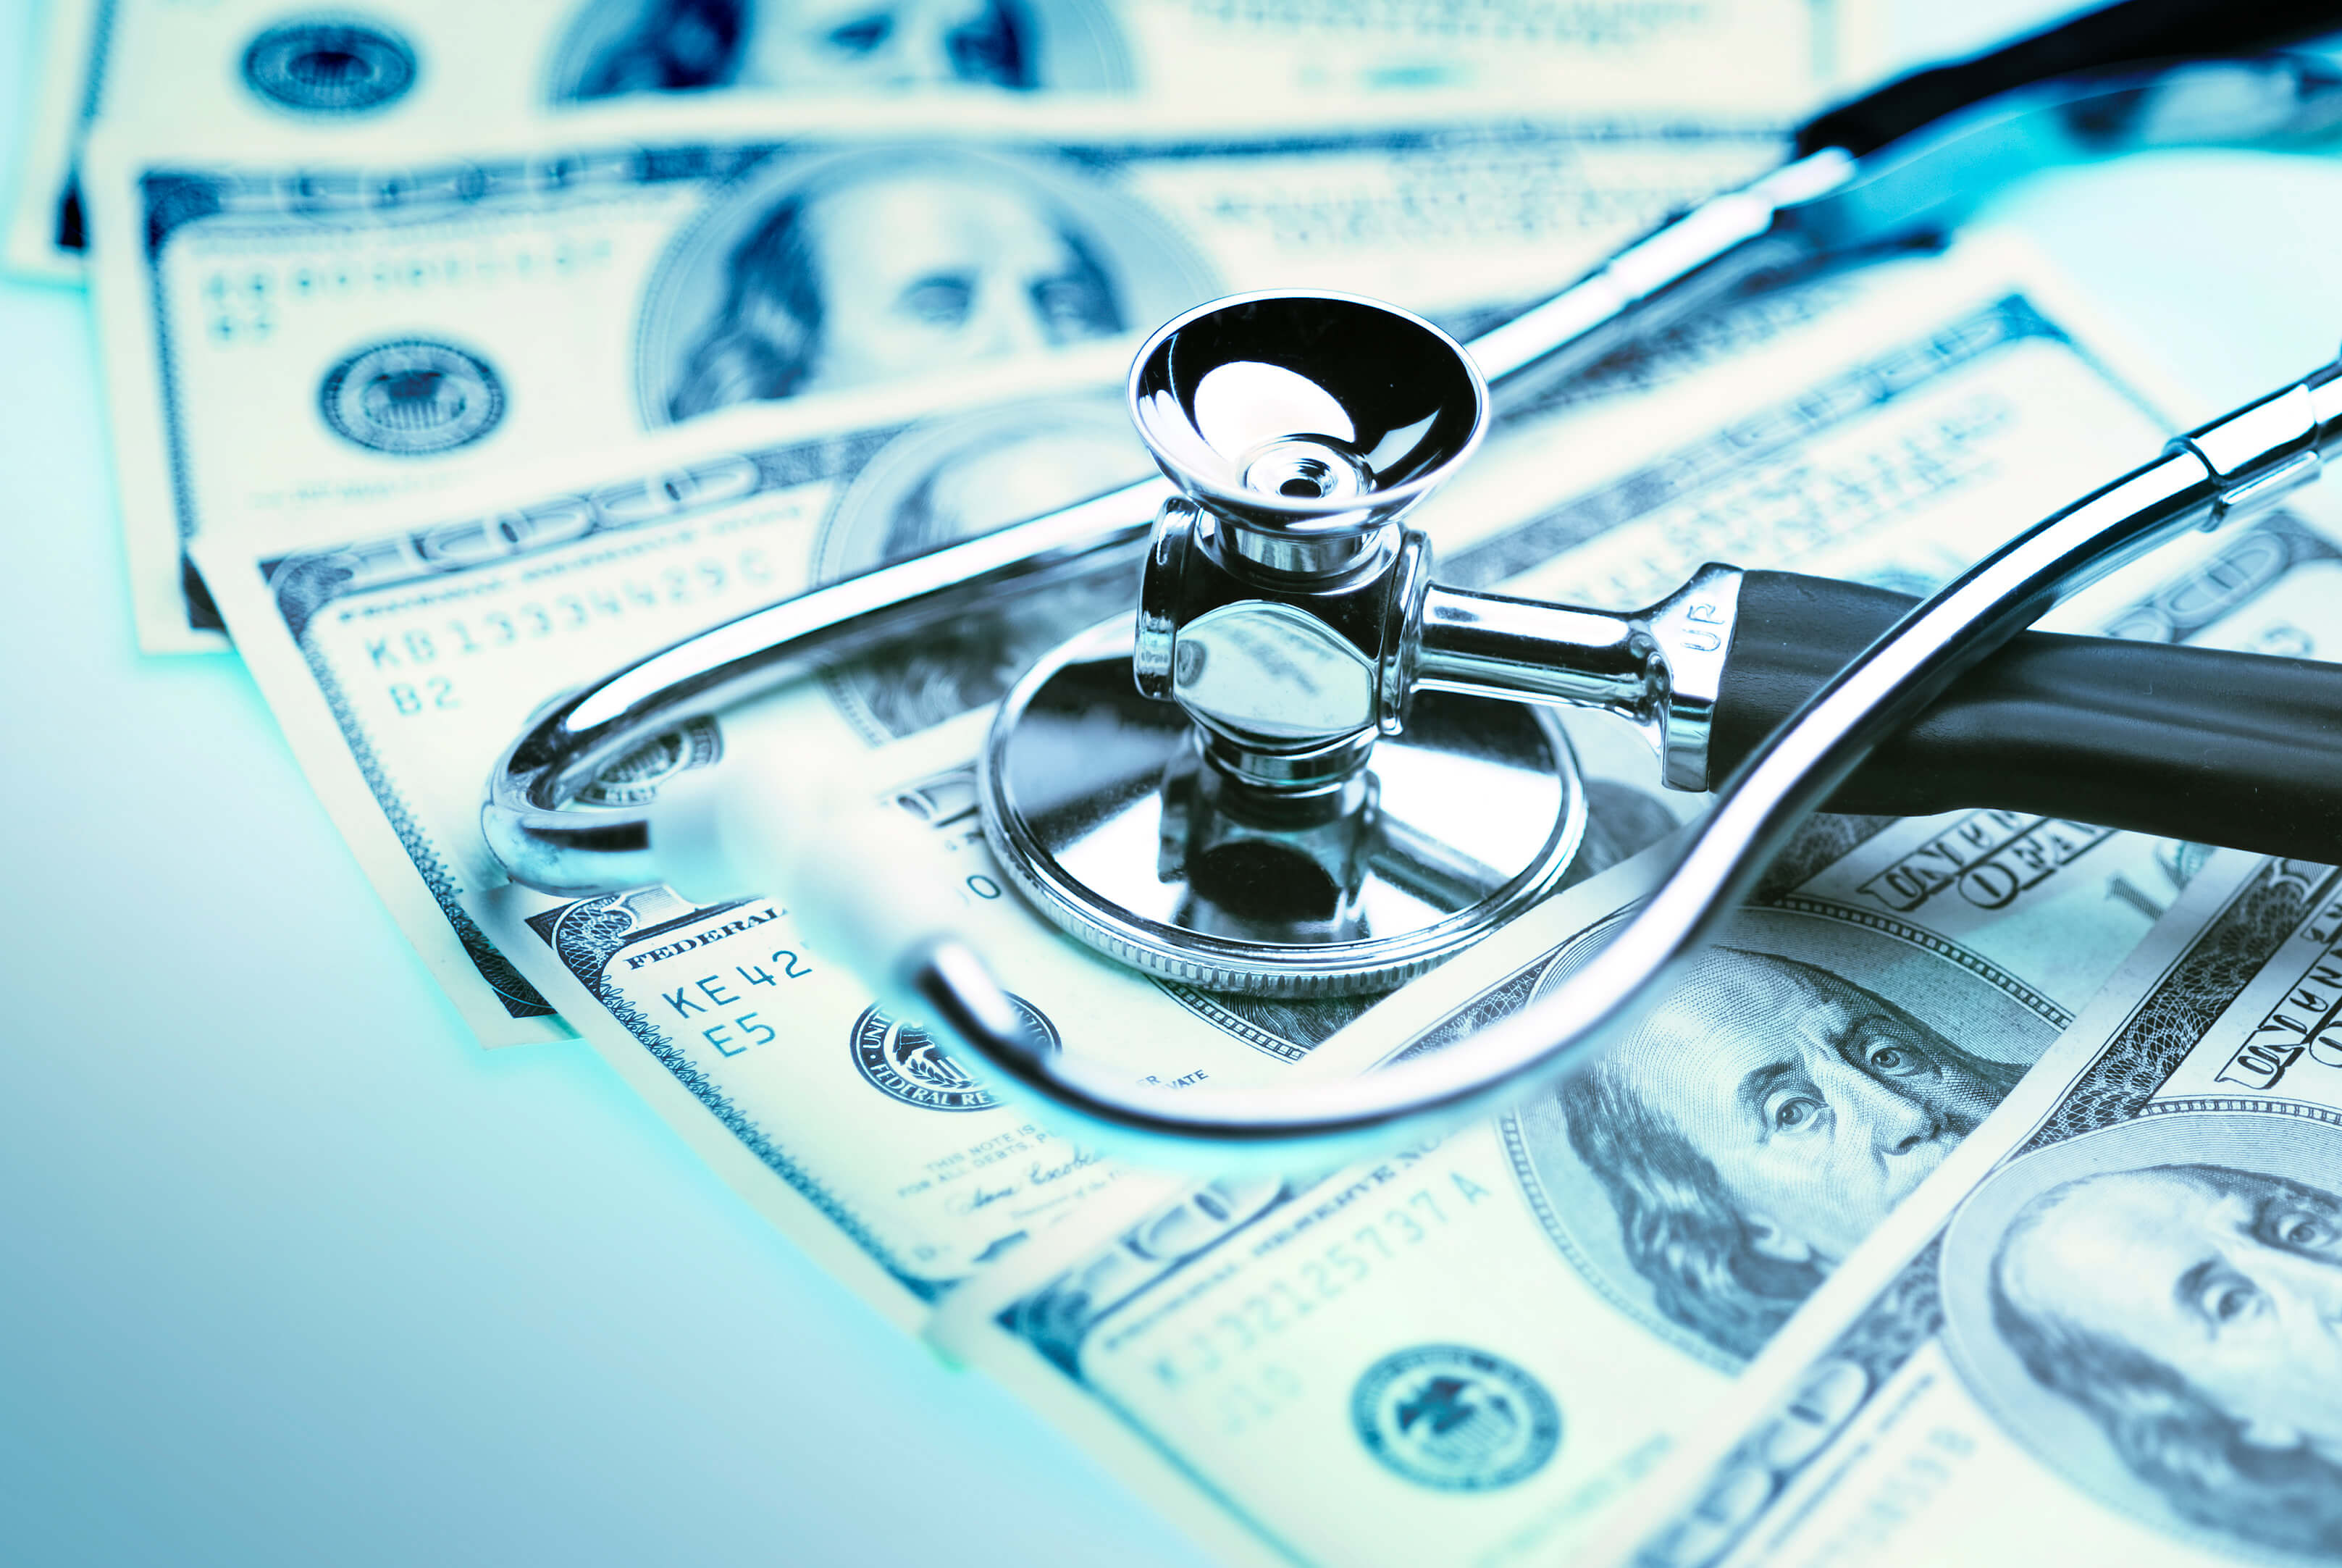

<b>🙋‍♂️🙋‍♀️ Hi all !!! we are going to work with insurance cost prediction dataset,If you like this notebook then plz consider a upvote for me and if don't plz drop your advise or comment so that i improve my skill 😎😎

<a id="100"></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding: 20px; background-color:red;color: Black;font-weight: bold;
              text-align: center; font-size:250%;border-radius:20px 80px;">📋 TABLE OF CONTENTS</p>

* [1. Importing Libraries](#1)

* [2. Load the data](#2)
    
* [3. Meta information of dataframe](#3)
    
* [4.Missing values.](#4)

* [3.1 Duplicated rows.](#4.1)
    
* [4.Statistical information of Dataframe](#5) 

* [5.Visualize correlation of independent features and check multicolinarity problems](#6)
    
* [6. EDA & Visualization](#7)
    
* [7. 🏍Feature Engineering](#8)

    * [7.1.🏍outliers detection](#8.1)
    
    * [7.2.🏍Change BMI to category](#8.2)
    
    * [7.3.🏍Train test split](#8.3)
       
    * [7.4.Encoding and Scaling Features](#8.4)
       
    

* [8. Create & Train Model](#8)

* [9. Models Score](#9)

* [10. Visualize Models Score](#10)






<a id=""></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="padding: 20px; background-color:red;color: Black;font-weight: bold;
              text-align: center; font-size:250%;border-radius:20px 80px;"> 🚢Data Story</p>

# Data attributes:

1. age: age of primary beneficiary.

2. sex: insurance contractor gender, female, male.

3. bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.

4. children: Number of children covered by health insurance / Number of dependents.

5. smoker: Smoking.

6. region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

7. charges: Individual medical costs billed by health insurance.

<a id="1"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:red;color: Black;font-weight: bold;
              text-align: center; font-size:250%;border-radius:20px 80px;">🎰 Importing Libraries</p>

In [157]:
#importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler,MinMaxScaler,PowerTransformer,FunctionTransformer
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from xgboost.sklearn import XGBRegressor
import warnings
warnings.filterwarnings("ignore")


import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from plotly import tools


%matplotlib inline 


<a id="2"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:red;color: Black;font-weight: bold;
              text-align: center; font-size:250%;border-radius:20px 80px;">🎰 Load the dataset</p>

In [158]:
#load and check the shape .
df=pd.read_csv("insurance.csv")
#check the data 
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<a id="3"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:red;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;">📝 Meta information 
    about Dataframe</p>

In [159]:
#check the rows and columns number.
print(f"number of rows:--> {df.shape[0]} and number of columns:--> {df.shape[1]}")

number of rows:--> 1338 and number of columns:--> 7


In [160]:
#chack the data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<a id="4"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:red;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;">🛒Missing values </p>

In [161]:
#check for missing values 
def checking_m(df):
    null_v = df.isnull().sum().sort_values(ascending=False)
    null_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    null_v = pd.concat([null_v, null_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return null_v

checking_m(df)

,Missing_Number,Missing_Percent
age,0,0.0
sex,0,0.0
bmi,0,0.0
children,0,0.0
smoker,0,0.0
region,0,0.0
charges,0,0.0


<b>No missing or Nan values found , great 😁

<a id="4.1"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:red;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;">🤼‍♀️Duplicated rows </p>

In [162]:
#check for dublicated rows
print("Numbers of duplicated rows :",df.duplicated().sum())

Numbers of duplicated rows : 1


<b> Oh no , 1 duplicated rows found 🥵,let's remove it 😙

In [163]:
#dropping the duplicated rows 
df=df.drop_duplicates(keep="first")
print("After removing,now number of duplicated rows are:",df.duplicated().sum())

After removing,now number of duplicated rows are: 0


<a id="5"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:red;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;">📈 Statistical information of Dataframe </p>

In [164]:
#check data description
df.describe().T.style.bar(subset=['mean'], color='#205ff2').background_gradient(subset=['std'], cmap='mako').background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
age,1337.000000,39.222139,14.044333,18.000000,27.000000,39.000000,51.000000,64.000000
bmi,1337.000000,30.663452,6.100468,15.960000,26.290000,30.400000,34.700000,53.130000
children,1337.000000,1.095737,1.205571,0.000000,0.000000,1.000000,2.000000,5.000000
charges,1337.000000,13279.121487,12110.359656,1121.873900,4746.344000,9386.161300,16657.717450,63770.428010


In [165]:
#check the correlation between terget and each of columns
df.corr()["charges"]

age         0.298308
bmi         0.198401
children    0.067389
charges     1.000000
Name: charges, dtype: float64

<a id="6"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:red;color: Black;font-weight: bold;
              text-align: center; font-size:150%;border-radius:20px 80px;">🎰 Visualize correlation of independent features and check multicolinarity problems </p>

<AxesSubplot:>

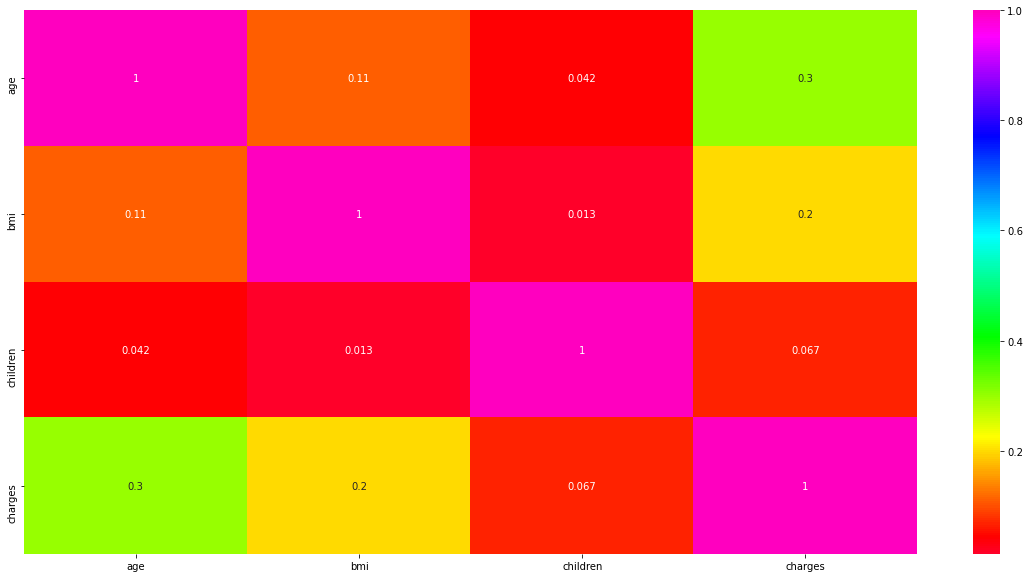

In [166]:
plt.figure(figsize=(20,10))

#plot heat map
sns.heatmap(df.corr(),annot=True,cmap="gist_rainbow",linecolor='black')

<b> No highly correlated independent features or no multicolinarity problems 😎

<a id="7"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:red;color: Black;font-weight: bold;
              text-align: center; font-size:250%;border-radius:20px 80px;">🔥 EDA & Visualization</p>

In [167]:
cat_col=["sex","smoker","region","children"]

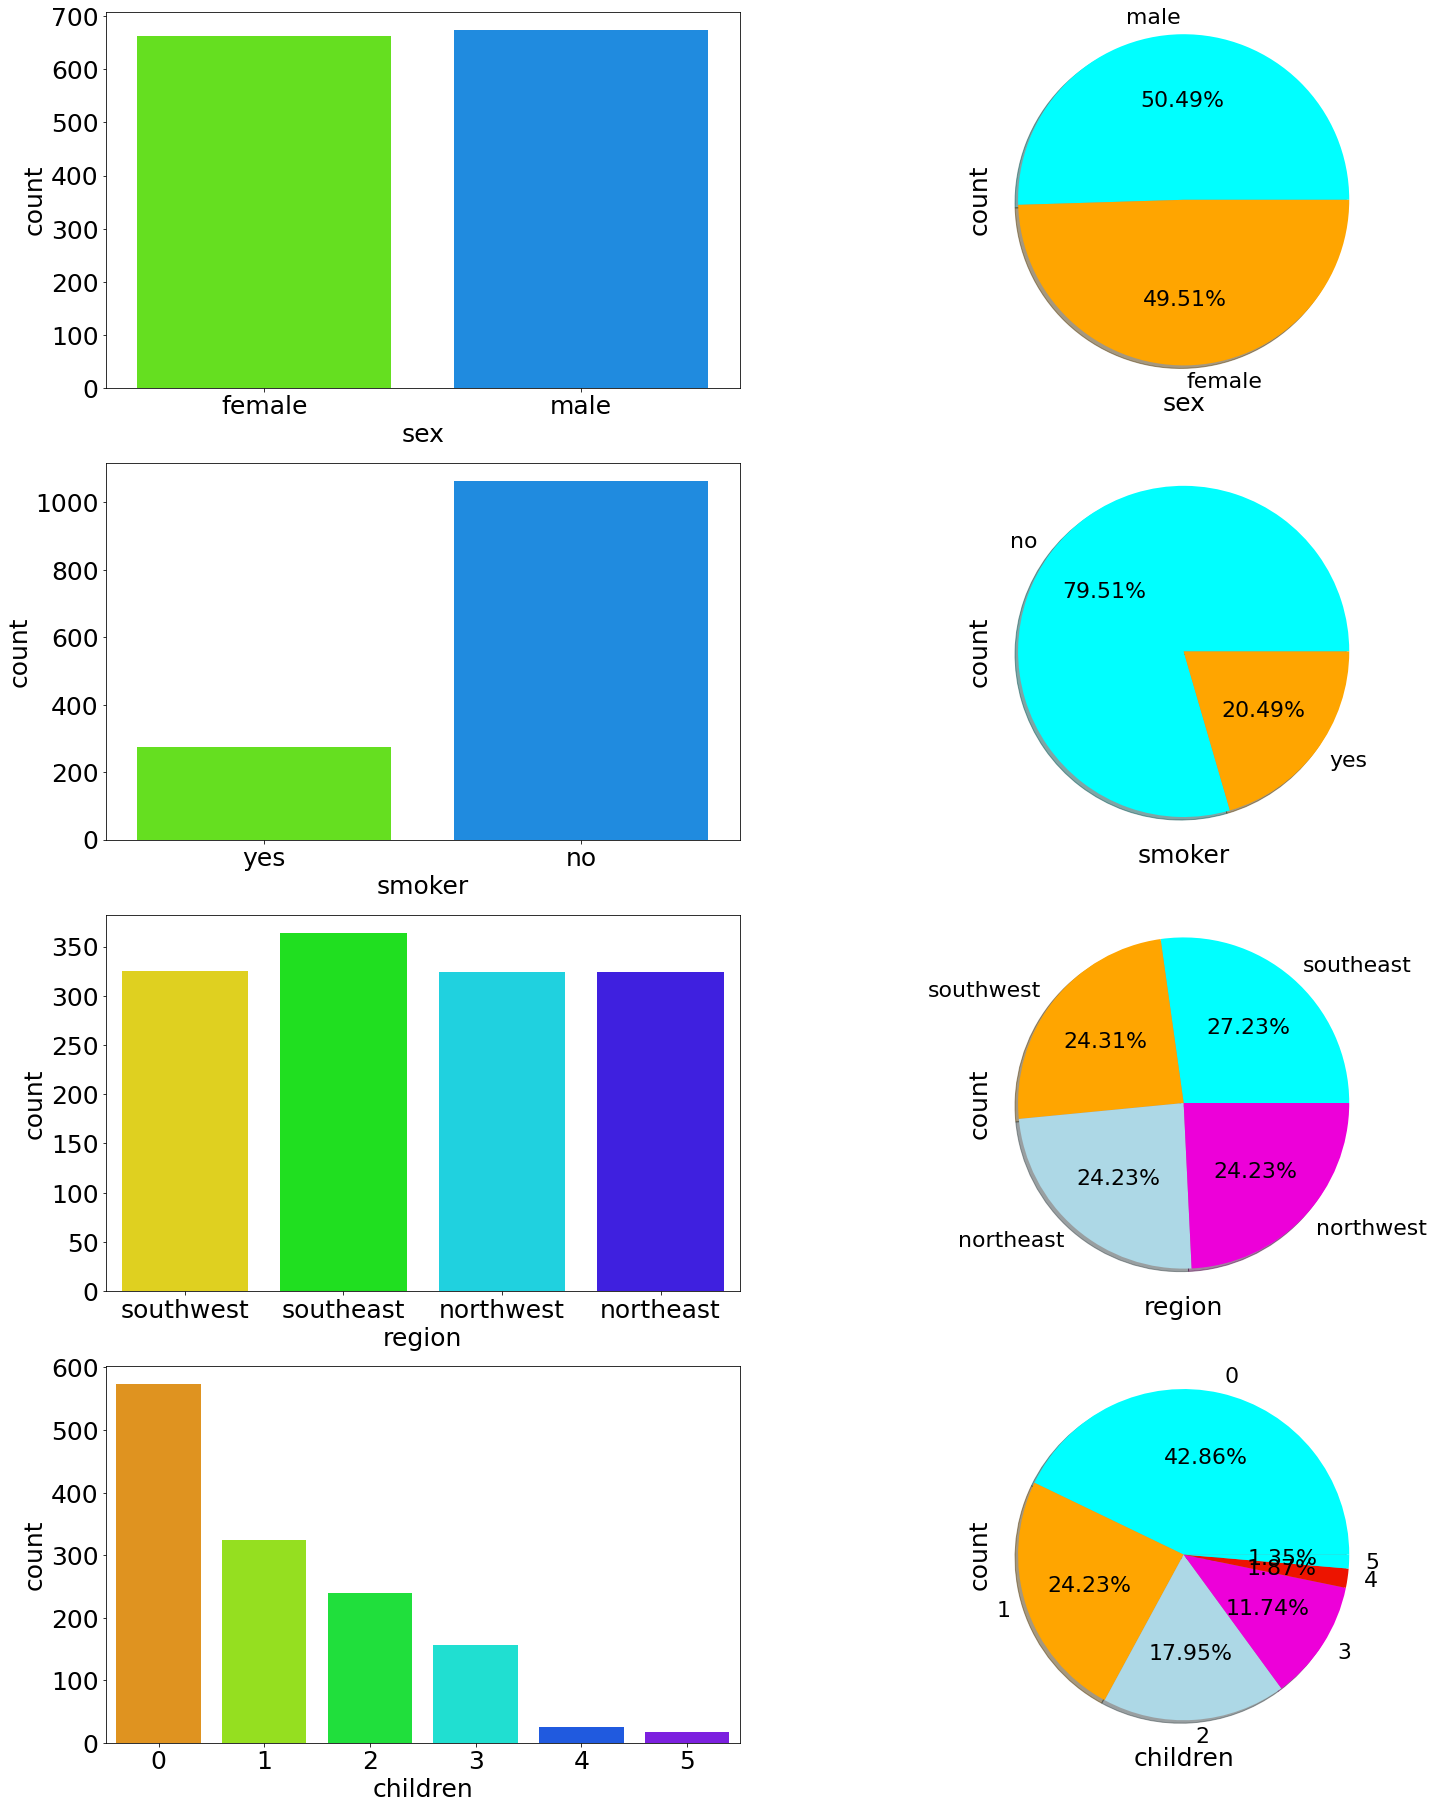

In [168]:
colors=["#00FFFF","#FFA500","#ADD8E6","#ED00D9","#ED1400"]
textprops = {"fontsize":22}
i=1
plt.figure(figsize=(25,90))
for col in cat_col:
    plt.subplot(11,2,i)
    sns.countplot(data=df,x=col,palette="gist_rainbow")
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel("count",fontsize=25)
    i=i+1
    plt.subplot(11,2,i)
    df[col].value_counts().plot(kind="pie",autopct="%.2f%%",colors=colors,textprops=textprops,shadow=True, radius = 1.1)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel("count",fontsize=25)
    i=i+1

plt.show()

<AxesSubplot:xlabel='sex', ylabel='count'>

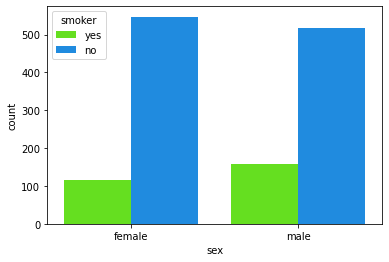

In [169]:
#analysis sex vs smoker columns combinely 
sns.countplot(df["sex"],hue=df["smoker"],palette="gist_rainbow")

we got some female smoker and male smoker but also we realized that most of the female are non smoker compare to male 

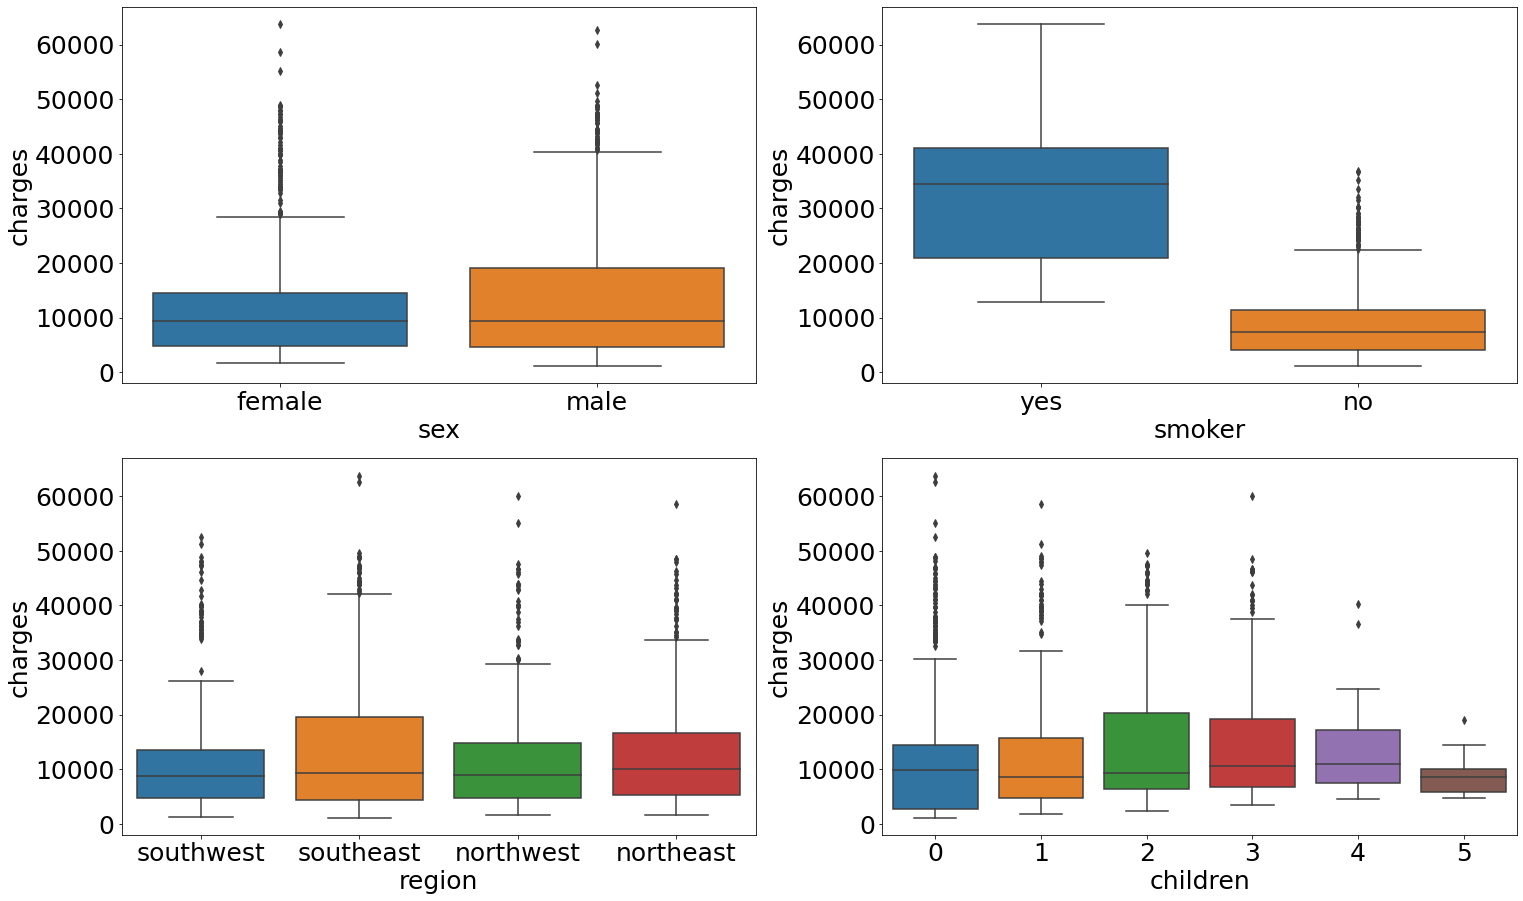

In [170]:
i=1
plt.figure(figsize=(25,90))
for col in cat_col:
    
    plt.subplot(11,2,i)
    sns.boxplot(df[col],df["charges"])
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel(col,fontsize=25)
    plt.ylabel("charges",fontsize=25)
    i=i+1

plt.show()

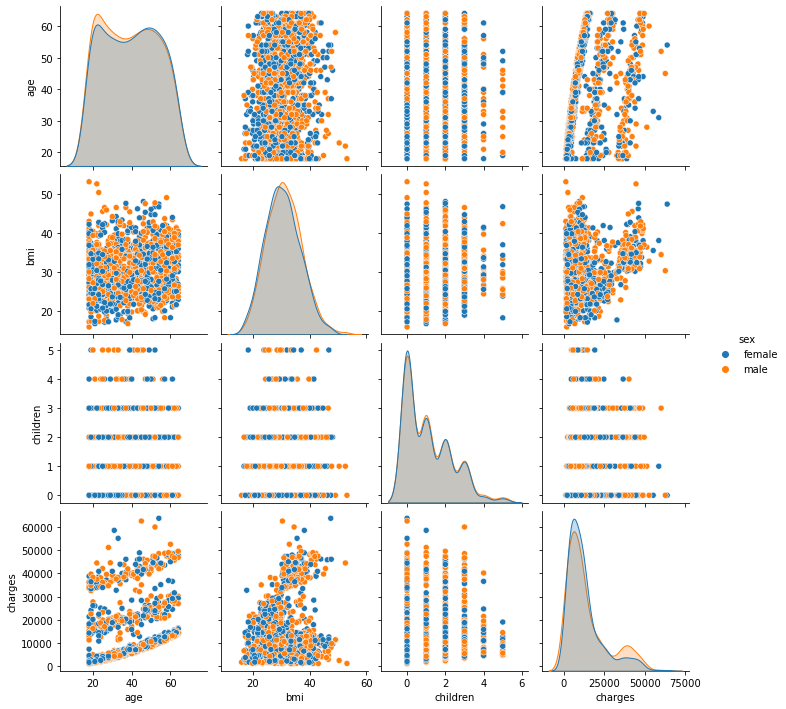

In [171]:
#anlysis numerical columns
sns.pairplot(df,hue="sex")

Text(0.5, 0, 'charges')

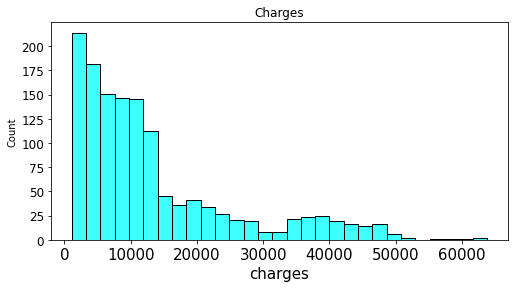

In [172]:
#analysis chareges columns
plt.figure(figsize=(18,4))
plt.subplot(121)
sns.histplot(df["charges"],color="#00FFFF")
plt.title("Charges")
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel("charges",fontsize=15)



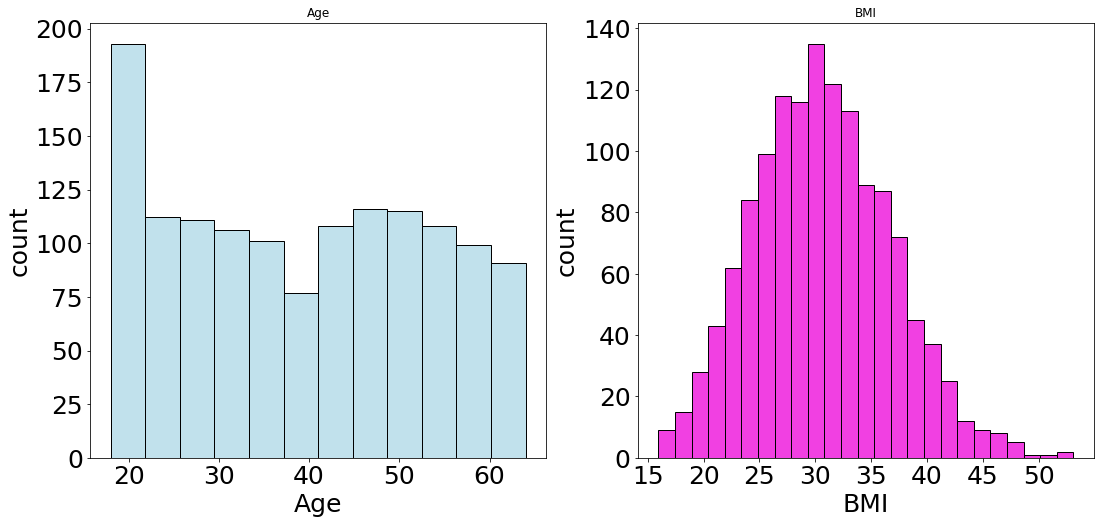

In [173]:
#analysis age and bmi columns
plt.figure(figsize=(18,8))
plt.subplot(121)
sns.histplot(df["age"],color="#ADD8E6",fill=True)
plt.title("Age")
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel("Age",fontsize=25)
plt.ylabel("count",fontsize=25)
    

plt.subplot(122)
sns.histplot(df["bmi"],color="#ED00D9")
plt.title("BMI")
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel("BMI",fontsize=25)
plt.ylabel("count",fontsize=25)
   

plt.show()


<Figure size 1440x576 with 0 Axes>

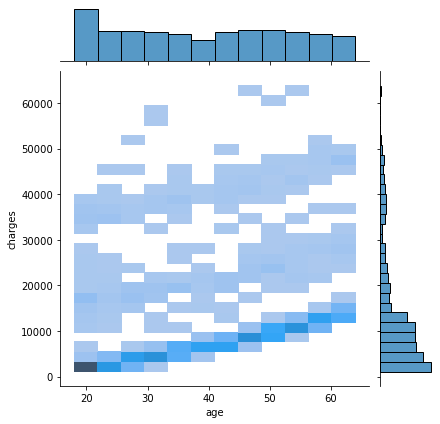

In [174]:
#analysis age vs charges columns 
plt.figure(figsize=(20,8))
sns.jointplot(df["age"],df["charges"],kind="hist")

<Figure size 1440x576 with 0 Axes>

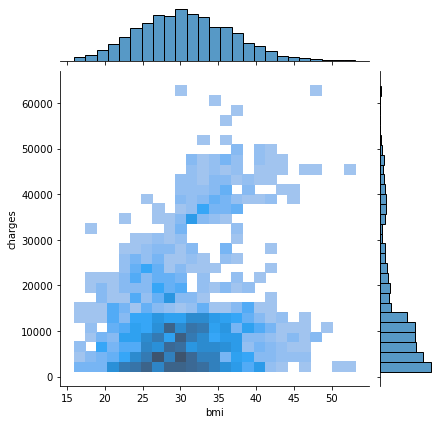

In [175]:
#analysis bmi vs charges columns 
plt.figure(figsize=(20,8))
sns.jointplot(df["bmi"],df["charges"],kind="hist")

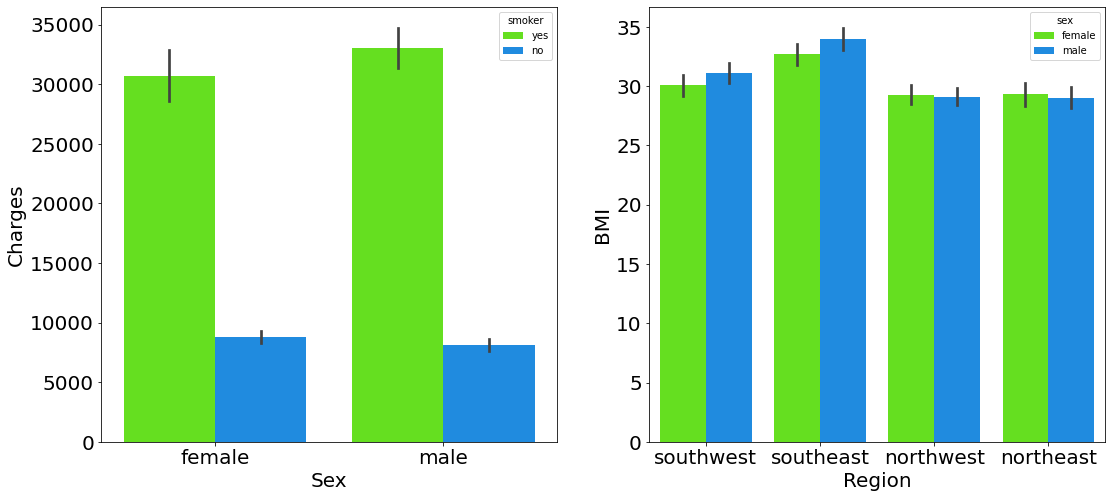

In [176]:
#numerical - categorical col analysis
plt.figure(figsize=(18,8))
plt.subplot(121)
sns.barplot(df["sex"],df["charges"],hue=df["smoker"],palette="gist_rainbow")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Sex",fontsize=20)
plt.ylabel("Charges",fontsize=20) 
 

plt.subplot(122)
sns.barplot(df["region"],df["bmi"],hue=df["sex"],palette= 'gist_rainbow')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Region",fontsize=20)
plt.ylabel("BMI",fontsize=20)
 


plt.show()


<a id="8"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:red;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;">🚂Features Engineering</p>

<a id="8.1"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:red;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;">🚂Outliers detection</p>

<AxesSubplot:xlabel='age'>

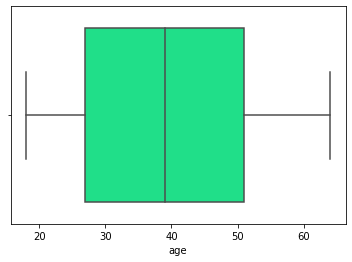

In [177]:
#checking for outlier in age col...
sns.boxplot(df["age"],palette="gist_rainbow") #colors=["#00FFFF","#FFA500","#ADD8E6","#ED00D9","#ED1400"]

all is well ,no outlier is detected

<AxesSubplot:xlabel='bmi'>

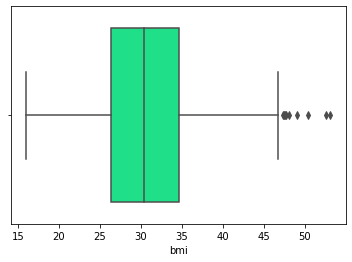

In [178]:
#outliers in bmi col...
sns.boxplot(df["bmi"],palette="gist_rainbow")

<b>oho,some outlier is found in bmi col.

<AxesSubplot:xlabel='bmi', ylabel='Density'>

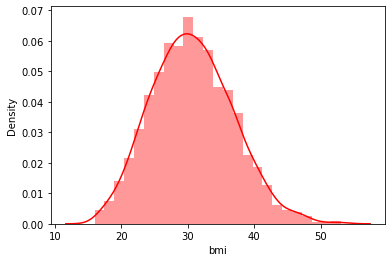

In [179]:
#first check the distribution...
sns.distplot(df["bmi"],kde=True,color="red")

In [180]:
#With this function we detect the outliers 
def outlier(data):

    mean=data.mean()
    std=data.std()
    mini=data.min()
    maxi=data.max()

    #let find the boundaries for outlier
    highest=data.mean() + 3*data.std()
    lowest=data.mean() - 3*data.std()

        #finally, let find the outlier
    outliers=df[(data>highest) | (data<lowest)]
        

    return outliers


In [181]:
#outliers detection and remove  
new=pd.DataFrame(df["bmi"],columns=["bmi"])
for col in new.columns:
    test=outlier(df[col])
    print("columns name :",col)
    print("numbers of outliers:",len(test))
    print("\n")
    print(test)
    print("<<<<<<<<<------------------------------------->>>>>>>>>")
    df=df.drop(test.index,axis=0)                        #drop the outliers by thier index
   
    


columns name : bmi
numbers of outliers: 4


      age   sex    bmi  children smoker     region     charges
116    58  male  49.06         0     no  southeast  11381.3254
847    23  male  50.38         1     no  southeast   2438.0552
1047   22  male  52.58         1    yes  southeast  44501.3982
1317   18  male  53.13         0     no  southeast   1163.4627
<<<<<<<<<------------------------------------->>>>>>>>>


<b>the outliers are removed ,great!!!!!!

<a id="8.2"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:red;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;">🚂Change  bmi to category</p>

In [182]:
#function that will change  bmi to a category
def weightCondition(bmi):
  if bmi<18.5:
    return "Underweight"
  elif (bmi>= 18.5)&(bmi< 24.986):
    return "Normal"
  elif (bmi >= 25) & (bmi < 29.926):
    return "Overweight"
  else:
    return "Obese"
df["weight_Condition"]=[weightCondition(val) for val in df["bmi"] ]
df.head(5)

,age,sex,bmi,children,smoker,region,charges,weight_Condition
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Normal
4,32,male,28.880,0,no,northwest,3866.85520,Overweight


<a id="8.3"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:red;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;"> 🐱‍🏍Train test split</p>

In [184]:
#get the features and terget col
Y=df.charges
X=df.drop(["charges"],axis=1)
#train test split  
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
print("X_train shape: ",x_train.shape)
print("X_test shape: ",x_test.shape)
print()
print("Y_train shape: ",y_train.shape)
print("Y_test shape: ",y_test.shape)


X_train shape:  (1066, 7)
X_test shape:  (267, 7)

Y_train shape:  (1066,)
Y_test shape:  (267,)


<a id="8.4"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:red;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;"> 🐱‍🏍Encoding and scaling</p>

In [185]:
x_train.head()

,age,sex,bmi,children,smoker,region,weight_Condition
1284,61,male,36.30,1,yes,southwest,Obese
1114,23,male,24.51,0,no,northeast,Normal
969,39,female,34.32,5,no,southeast,Obese
600,18,female,39.16,0,no,southeast,Obese
171,49,male,30.30,0,no,southwest,Obese


In [186]:
x_train["weight_Condition"].unique()

array(['Obese', 'Normal', 'Overweight', 'Underweight'], dtype=object)

In [187]:
#pipe1 contain 2 encoder ,one hot encoder and ordinal encoder
#ohe encode sex,smoker,region
#ordinal encode the weight_condition col because we arrange the order on this col
#pipe2 just scale all the columns 
pipe1=ColumnTransformer(transformers=[("OHE",OneHotEncoder(sparse=False,drop="first"),
                                       ["sex","smoker","region"]),
                                     ("ordinal",OrdinalEncoder(categories=[['Underweight','Normal','Overweight','Obese']]),
                                      ["weight_Condition"])]
                        ,remainder="passthrough")
pipe2=ColumnTransformer(transformers=[("scaling",StandardScaler(),[0,1,2,3,4,5,6,7,8])],
                        remainder="passthrough")

pipe=Pipeline([("pipe1",pipe1),("pipe2",pipe2)])
x_train=pd.DataFrame(pipe.fit_transform(x_train))
x_test=pd.DataFrame(pipe.transform(x_test))
x_train.head()

,0,1,2,3,4,5,6,7,8
0,0.979571,1.995322,-0.569406,-0.617113,1.751771,0.843691,1.554508,0.960143,-0.092229
1,0.979571,-0.501172,-0.569406,-0.617113,-0.570851,-1.647651,-1.154812,-1.019125,-0.918415
2,-1.020855,-0.501172,-0.569406,1.620448,-0.570851,0.843691,-0.014046,0.627747,3.212513
3,-1.020855,-0.501172,-0.569406,1.620448,-0.570851,0.843691,-1.511301,1.440271,-0.918415
4,0.979571,-0.501172,-0.569406,-0.617113,1.751771,0.843691,0.698933,-0.047118,-0.918415


all the columns are scalled 

<a id="8"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:red;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;"> 🤖 Create & Train Model</p>

In [188]:
#this function used to evalute the models with features and terget.
def models_score(models, x_train, x_test, y_train, y_test):    
    
    scores = {}
    
    for name, model in models.items():
        model.fit(x_train, y_train)
        y_pred=model.predict(x_test) 
        scores[name] =r2_score(y_test,y_pred)
        #printing the model name and accuracy !!!!!
        print("Model name: ",model)
        print("R2 score :--->>",r2_score(y_test,y_pred))
        print("MSE",mean_squared_error(y_test,y_pred))
        print("MAE",mean_absolute_error(y_test,y_pred))
        print("\n<<<<------------------------------------------------------------->>>>\n")
           
   
    model_scores = pd.DataFrame(scores, index=['Score']).transpose()
    model_scores = model_scores.sort_values('Score',ascending=False)
    return model_scores

In [189]:
#initialize the models 
models = {"LinearRegression":LinearRegression(),
          "AdaBoost":AdaBoostRegressor(learning_rate= 0.001,loss='exponential',n_estimators= 50,random_state=42),
          "GradiantBoost":GradientBoostingRegressor(criterion= 'mse',learning_rate= 0.05, loss="ls",n_estimators= 100,random_state=42),
         "RandomForest":RandomForestRegressor(criterion='mae',n_estimators=150,max_depth=8,random_state=42),
         "XgBoost": XGBRegressor(),
         "KNeighborsRegressor":KNeighborsRegressor(metric ='minkowski',n_neighbors= 9, weights= 'distance')}

<a id="9"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:red;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;">🧮 Models Score</p>

In [190]:
#Calling the function
model_scores = models_score(models, x_train, x_test, y_train, y_test)

Model name:  LinearRegression()
R2 score :--->> 0.7624017090529593
MSE 39241504.88055495
MAE 4455.764648216178

<<<<------------------------------------------------------------->>>>

Model name:  AdaBoostRegressor(learning_rate=0.001, loss='exponential', random_state=42)
R2 score :--->> 0.873561882468896
MSE 20882397.707527775
MAE 2647.926103348521

<<<<------------------------------------------------------------->>>>

Model name:  GradientBoostingRegressor(criterion='mse', learning_rate=0.05, random_state=42)
R2 score :--->> 0.8816447892921658
MSE 19547432.601970207
MAE 2453.812095930796

<<<<------------------------------------------------------------->>>>

Model name:  RandomForestRegressor(criterion='mae', max_depth=8, n_estimators=150,
                      random_state=42)
R2 score :--->> 0.8752678533490297
MSE 20600641.20013869
MAE 2063.9589191065174

<<<<------------------------------------------------------------->>>>

Model name:  XGBRegressor(base_score=0.5, booster='gbtree'

In [191]:
model_scores

,Score
GradiantBoost,0.881645
RandomForest,0.875268
AdaBoost,0.873562
KNeighborsRegressor,0.844487
XgBoost,0.838489
LinearRegression,0.762402


<a id="10"></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:red;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;">📊 Visualize Model Score</p>

In [192]:
model_scores = model_scores.reset_index().rename({"index":"Algorithms"}, axis = 1)

model_scores.style.bar()

,Algorithms,Score
0,GradiantBoost,0.881645
1,RandomForest,0.875268
2,AdaBoost,0.873562
3,KNeighborsRegressor,0.844487
4,XgBoost,0.838489
5,LinearRegression,0.762402


In [193]:
fig = px.bar(data_frame = model_scores,
             x="Algorithms",
             y="Score",
             color="Algorithms", title = "<b>Models Score</b>", template = 'plotly_dark')

fig.update_layout(bargap=0.2)

fig.show()

In [194]:
label = model_scores['Algorithms']
value = model_scores['Score']

fig = go.Figure(data=[go.Pie(labels = label, values = value, rotation = 90)])

fig.update_traces(textposition='inside',
                  textinfo='percent+label',
                  marker=dict(line=dict(color='#000000', width = 1.5)))

fig.update_layout(title_x=0.5,
                  title_font=dict(size=20),
                  uniformtext_minsize=15)

fig.show()

 # [Back to Contents or Top🎯🎯](#100)

<a id=""></a>
<div class="list-group" id="1" role="tablist">
<p style="padding: 20px; background-color:#7FDBFF;color: Black;font-weight: bold;
              text-align: center; font-size:220%;border-radius:20px 80px;">🌈Thank you 🎃 Happy kaggling👅</p>